In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [13]:
dataset = pd.read_csv("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset/Weather.csv")
print(dataset.shape)

(119040, 31)


/var/folders/7t/3b3ftw4173nfsbh_5d5nj6mh0000gn/T/ipykernel_8139/1393192065.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset/Weather.csv")


Text(0, 0.5, 'MaxTemp')

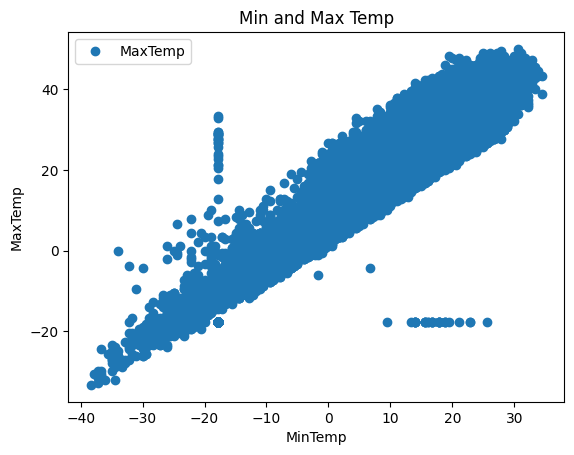

In [15]:
dataset.plot(x="MinTemp", y="MaxTemp",style="o")
plt.title("Min and Max Temp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")

In [16]:
dataset.describe

<bound method NDFrame.describe of           STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889      0.0      

In [21]:
# Train and Test Set
x = dataset["MinTemp"].values.reshape(-1,1)
y = dataset["MaxTemp"].values.reshape(-1,1) # y = dataset["MaxTemp"].values.reshape(:,np.newaxis)

In [25]:
# หั่นข้อมูลเป็น80% 20%
    # training 80%
    # test 20%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [23]:
# Training
    # ให้ Model ซึมซับการ Train
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# Test Model 
y_predict = model.predict(x_test) 
    # ใช้ x_test beacause we knew the value
    # จะได้ค่า y ที่เราคาดการณ์ แล้วก็นำมาเทียบกับ y ค่าจริงว่าคลาดเคลื่อนเท่าไหร่ 

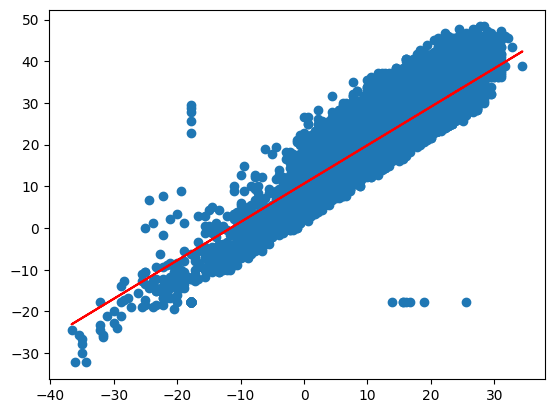

In [32]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict,color="r")
plt.show()

In [37]:
# หาความคลาดเคลื่อน y จริง กับ y_predict

df = pd.DataFrame({"Actually":y_test.flatten(), "Predicted":y_predict.flatten()})
df

,Actually,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


<Axes: >

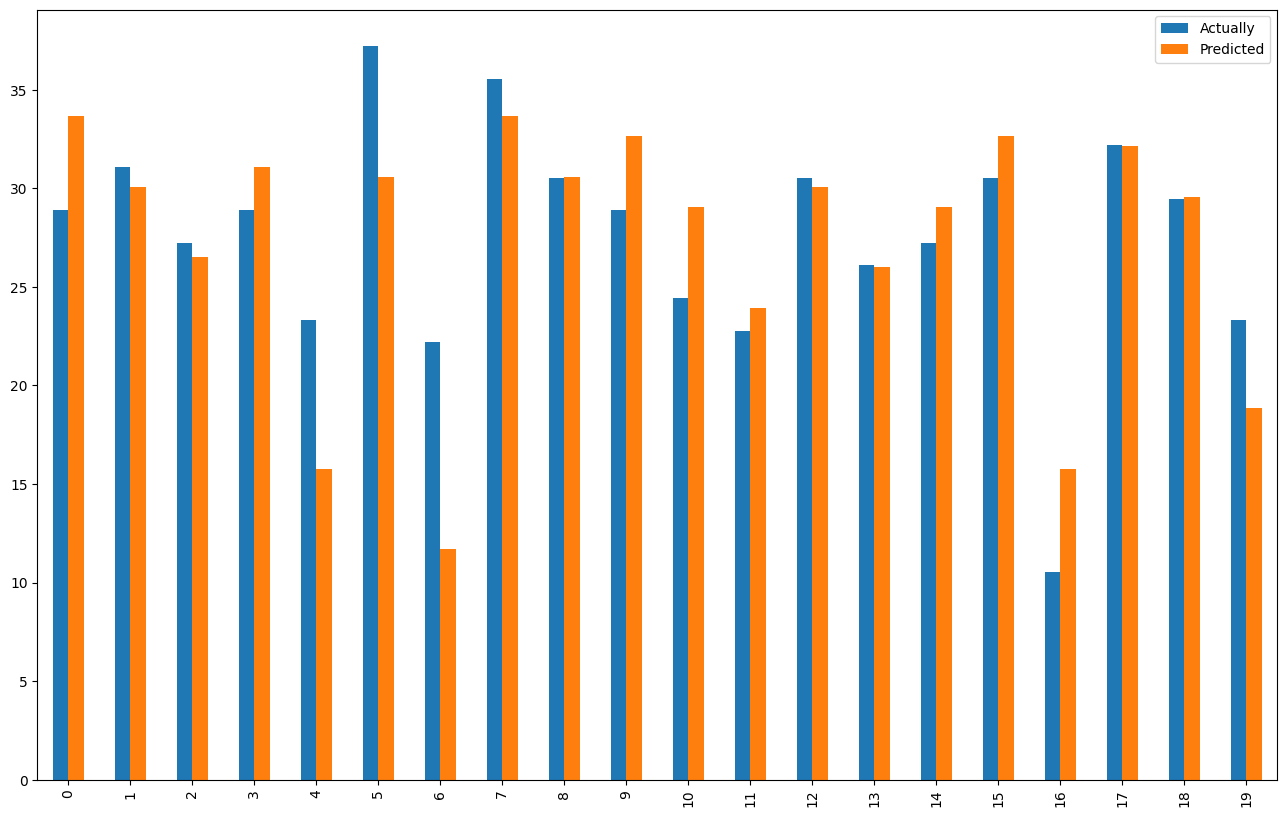

In [43]:
df1 = df.head(20)
df1.plot(kind="bar",figsize=(16,10))

In [52]:
# หาว่า y predict มีความแม่นยำเท่าไหร่ โดยใช้ค่า 3 ค่า
print(f"MAE = {metrics.mean_absolute_error(y_test, y_predict)}")        # MAE เข้าใกล้ 0 = แม่นยำ
print(f"MSE = {metrics.mean_squared_error(y_test, y_predict)}")
print(f"RMSE = {np.sqrt(metrics.mean_squared_error(y_test, y_predict))}")
print(f"Score = {metrics.r2_score(y_test, y_predict)*100}")                 # R-SQuared in between 0-1 คือ ค่าความแม่นยำ
                                                                        # R-SQuared has almost 100% is good
                                              

MAE = 3.199329178378584
MSE = 17.63156809756854
RMSE = 4.198996082109216
Score = 76.70218843587752
